In [111]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [16]:
ohe_data = pd.read_csv('OHE_dataset.csv', header=0)

In [17]:
ohe_data.head()

,AGEP_A,SHTFLU12M_A,SPOUSAGETC_A,EMPWKHRS2_A,EMPDYSMSS2_A,FAMINCTC_A,HIKIND02_A_2,HIKIND02_A_10,CHDEV_A_2,CHDEV_A_10,...,ANXEV_A_10,RX12M_A_2,RX12M_A_10,ANXFREQ_A_2,ANXFREQ_A_3,ANXFREQ_A_4,ANXFREQ_A_5,ANXFREQ_A_10,HYPMED_A_2.0,HYPMED_A_10.0
0,97,1,4.123980,0.000000,2.113454e-17,-0.235080,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,28,1,-2.439729,-0.475159,-1.790015e-01,-0.411479,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,72,0,1.270193,0.000000,2.113454e-17,-0.146880,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,60,1,0.604310,-0.054320,-1.790015e-01,0.823316,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,60,0,0.414058,4.827412,-1.790015e-01,-0.764278,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [18]:
target = 'SHTFLU12M_A'
X = ohe_data.drop(target, axis=1)
y = ohe_data[target]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [78]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

In [76]:
xrange = []
for step in range(len(rfecv.grid_scores_), 0, -1):
    xrange.append(max(len(X_train.columns.values)-step*10, 0))
    
xrange

[0, 0, 4, 14, 24, 34, 44, 54, 64, 74, 84, 94, 104, 114, 124, 134]

# RFECV Based on Decision Tree 

Optimal number of features : 84


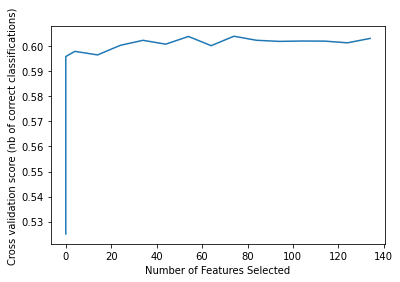

In [81]:
# Create the RFE object and compute a cross-validated score.
dtree = DecisionTreeClassifier()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=dtree, step=10, cv=StratifiedKFold(5),
              scoring='roc_auc')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross validation score (nb of correct classifications)")

plt.plot(xrange, rfecv.grid_scores_)
plt.show()

In [39]:
len(rfecv.grid_scores_)

16

In [54]:
rfecv.grid_scores_

array([0.52512286, 0.59537967, 0.59852058, 0.60060354, 0.60436742,
       0.6022323 , 0.60171358, 0.59889068, 0.60154781, 0.60129918,
       0.60219855, 0.60121564, 0.60371754, 0.603534  , 0.60352001,
       0.60386702])

In [41]:
X.columns.values[rfecv.support_]

array(['AGEP_A', 'SPOUSAGETC_A', 'EMPWKHRS2_A', 'EMPDYSMSS2_A',
       'FAMINCTC_A', 'HIKIND02_A_2', 'CHDEV_A_2', 'CHDEV_A_10',
       'DEMENEV_A_2', 'DEMENEV_A_10', 'HICOV_A_2', 'HICOV_A_10',
       'USUALPL_A_2', 'INCSSRR_A_1.0', 'INCSSRR_A_2.0', 'INCSSRR_A_7.0',
       'INCSSRR_A_9.0', 'PHSTAT_A_2', 'PHSTAT_A_3', 'PHSTAT_A_4',
       'PHSTAT_A_5', 'DEPEV_A_2', 'CANEV_A_2',
       'EMPDYSMSS2_A - Other/NA_1', 'HIKIND10_A_2', 'RSNHIWANT_A_1.0',
       'RSNHIWANT_A_2.0', 'RSNHIWANT_A_10.0', 'HIKIND01_A_2', 'GAD74_A_2',
       'GAD74_A_3', 'GAD74_A_4', 'GAD74_A_10', 'LASTDR_A_1', 'LASTDR_A_2',
       'LASTDR_A_3', 'LASTDR_A_4', 'LASTDR_A_5', 'LASTDR_A_6',
       'LASTDR_A_10', 'RXSK12M_A_1.0', 'RXSK12M_A_2.0', 'RXSK12M_A_10.0',
       'BPLAST_A_1', 'BPLAST_A_2', 'BPLAST_A_3', 'BPLAST_A_10',
       'SHTPNUEV_A_2', 'SHTPNUEV_A_10', 'ARTHEV_A_2', 'ANGEV_A_2',
       'MIEV_A_2', 'STREV_A_2', 'EMPWKHRS2_A - Other/NA_1',
       'ASER12M_A_2.0', 'CHLMED_A_2.0', 'visited_doctor_in_12m_1',
     

In [42]:
len(X.columns)

144

In [53]:
math.ceil((144 - 1) / 10) + 1

16

In [44]:
import math

In [56]:
144/16

9.0

In [58]:
from sklearn.feature_selection import RFE

In [83]:
# Create the RFE object and rank each pixel
rfe = RFE(estimator=dtree, n_features_to_select=80, step=5)
rfe.fit(X_train, y_train)
top_rfe = rfe.support_

X.columns.values[top_rfe]

array(['AGEP_A', 'SPOUSAGETC_A', 'EMPWKHRS2_A', 'EMPDYSMSS2_A',
       'FAMINCTC_A', 'HIKIND02_A_2', 'CHDEV_A_2', 'HICOV_A_2',
       'USUALPL_A_2', 'INCSSRR_A_1.0', 'INCSSRR_A_2.0', 'PHSTAT_A_2',
       'PHSTAT_A_3', 'PHSTAT_A_4', 'PHSTAT_A_5', 'DEPEV_A_2', 'CANEV_A_2',
       'EMPDYSMSS2_A - Other/NA_1', 'HIKIND10_A_2', 'RSNHIWANT_A_2.0',
       'HIKIND01_A_2', 'GAD74_A_2', 'GAD74_A_3', 'GAD74_A_4',
       'LASTDR_A_1', 'LASTDR_A_2', 'LASTDR_A_3', 'RXSK12M_A_1.0',
       'RXSK12M_A_2.0', 'BPLAST_A_1', 'SHTPNUEV_A_2', 'SHTPNUEV_A_10',
       'ARTHEV_A_2', 'MIEV_A_2', 'STREV_A_2', 'EMPWKHRS2_A - Other/NA_1',
       'CHLMED_A_2.0', 'visited_doctor_in_12m_1', 'DIBEV_A_2',
       'HIKIND04_A_2', 'PAYBLL12M_A_2', 'ASTILL_A_2.0', 'SPOUSEDUC_A_3.0',
       'SPOUSEDUC_A_4.0', 'SPOUSEDUC_A_5.0', 'SPOUSEDUC_A_6.0',
       'SPOUSEDUC_A_7.0', 'SPOUSEDUC_A_8.0', 'SPOUSEDUC_A_9.0',
       'SPOUSEDUC_A_11.0', 'SPOUSEDUC_A_99.0', 'ASEV_A_2', 'ORIENT_A_2',
       'ORIENT_A_10', 'AFVET_A_2', 'HOSPONGT_

RFE - Which are the top N features?
- repeatedly fits model to data, deletes n features with lowest score 
- stops when desired number of features are left 

RFECV - How many features, i.e. what is ideal N?
- Does RFE to drop n features at each step, calculates cross validation score of model after dropping n features 
- Highest CV score when features are dropped represents the best n_features

In [89]:
X_train_new = X_train[X.columns.values[top_rfe]]
X_test_new = X_test[X.columns.values[top_rfe]]

In [90]:
X_train_new.head()

,AGEP_A,SPOUSAGETC_A,EMPWKHRS2_A,EMPDYSMSS2_A,FAMINCTC_A,HIKIND02_A_2,CHDEV_A_2,HICOV_A_2,USUALPL_A_2,INCSSRR_A_1.0,...,HOUYRSLIV_A_5,ASAT12M_A_2.0,SPOUSAGETC_A - Other/NA_1,ANXEV_A_2,RX12M_A_2,ANXFREQ_A_2,ANXFREQ_A_3,ANXFREQ_A_4,ANXFREQ_A_5,HYPMED_A_2.0
20676,62,4.140576e-01,0.787358,-1.433084e-01,-0.411479,1,1,1,0,1,...,0,1,0,1,0,0,0,1,0,0
14493,52,-6.759123e-16,0.000000,2.113454e-17,-1.081796,0,1,0,1,0,...,0,1,1,0,0,1,0,0,0,1
14552,54,6.994362e-01,0.000000,-1.790015e-01,0.470517,1,1,0,0,0,...,1,1,0,1,0,0,0,0,1,1
19088,20,-3.010486e+00,0.000000,-1.790015e-01,0.470517,1,1,0,0,0,...,0,1,0,1,1,0,0,0,1,1
2961,62,-6.759123e-16,-3.084360,-6.002457e-02,-0.958317,0,1,0,0,1,...,0,1,1,1,1,0,0,1,0,1


In [96]:
from sklearn.metrics import roc_auc_score, roc_curve

In [98]:
#Dtree fit on 80 features of 144 - Test AUC score
dtree_new = DecisionTreeClassifier()
dtree_new.fit(X_train_new, y_train)
preds_new = dtree_new.predict_proba(X_test_new)
print(roc_auc_score(y_test, preds_new[:, 1]))

0.6203674701688797


In [99]:
#Dtree fit on all 144 features - Test AUC score
dtree_old = DecisionTreeClassifier()
dtree_old.fit(X_train, y_train)
preds_old = dtree_old.predict_proba(X_test)
print(roc_auc_score(y_test, preds_old[:, 1]))

0.6152031138045736


In [102]:
fpr, tpr, thresholds = roc_curve(y_test, preds_new[:,1])

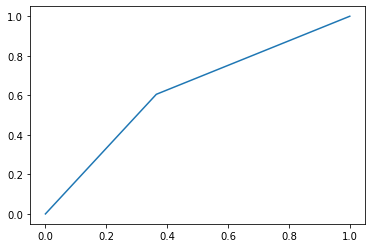

In [103]:
plt.plot(fpr, tpr)

In [104]:
fpr

array([0.       , 0.3644015, 1.       ])

In [105]:
import scikitplot as skplt

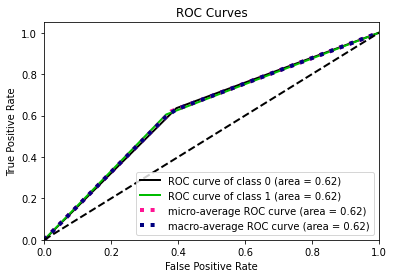

In [107]:
skplt.metrics.plot_roc(y_test, preds_new)
plt.show()

# RFECV Based on LogReg

Optimal number of features : 104


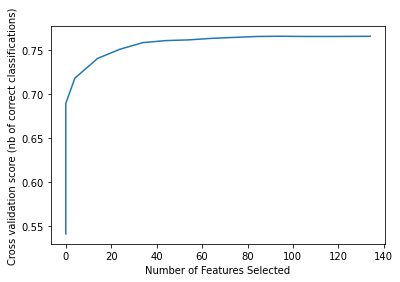

In [112]:
# Create the RFE object and compute a cross-validated score.
lr = LogisticRegression()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=lr, step=10, cv=StratifiedKFold(5),
              scoring='roc_auc')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross validation score (nb of correct classifications)")

plt.plot(xrange, rfecv.grid_scores_)
plt.show()

In [114]:
# Create the RFE object and rank each pixel
rfe = RFE(estimator=lr, n_features_to_select=40, step=5)
rfe.fit(X_train, y_train)
top_rfe = rfe.support_

X.columns.values[top_rfe]

array(['CHDEV_A_10', 'DEMENEV_A_10', 'HICOV_A_10', 'USUALPL_A_2',
       'INCSSRR_A_7.0', 'INCSSRR_A_8.0', 'DEPEV_A_10', 'CANEV_A_10',
       'RSNHIWANT_A_1.0', 'RSNHIWANT_A_2.0', 'RSNHIWANT_A_10.0',
       'LASTDR_A_5', 'LASTDR_A_6', 'RXSK12M_A_2.0', 'BPLAST_A_1',
       'BPLAST_A_3', 'BPLAST_A_4', 'BPLAST_A_6', 'BPLAST_A_10',
       'SHTPNUEV_A_2', 'SHTPNUEV_A_10', 'ANGEV_A_10', 'CHLMED_A_2.0',
       'CHLMED_A_10.0', 'SPOUSEDUC_A_8.0', 'SPOUSEDUC_A_9.0',
       'SPOUSEDUC_A_10.0', 'SPOUSEDUC_A_11.0', 'SPOUSEDUC_A_97.0',
       'ORIENT_A_3', 'ORIENT_A_10', 'CHOLLAST_A_1', 'CHOLLAST_A_6',
       'MARITAL_A_10', 'ECIGEV_A_2', 'ECIGEV_A_10', 'HOUYRSLIV_A_7',
       'ASAT12M_A_10.0', 'dont_want_health_ins_1', 'HYPMED_A_10.0'],
      dtype=object)

In [115]:
X_train_new = X_train[X.columns.values[top_rfe]]
X_test_new = X_test[X.columns.values[top_rfe]]

In [116]:
#LR fit on 80 features of 144 - Test AUC score
lr_new = LogisticRegression()
lr_new.fit(X_train_new, y_train)
preds_new = lr_new.predict_proba(X_test_new)
print(roc_auc_score(y_test, preds_new[:, 1]))

0.7566819308070114


In [117]:
#LR fit on all 144 features - Test AUC score
lr_old = LogisticRegression()
lr_old.fit(X_train, y_train)
preds_old = lr_old.predict_proba(X_test)
print(roc_auc_score(y_test, preds_old[:, 1]))

0.762368356796612


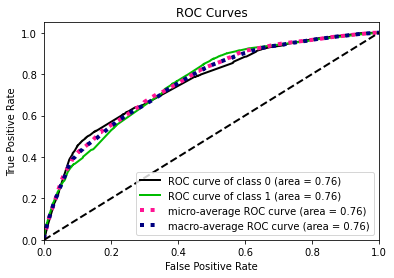

In [118]:
skplt.metrics.plot_roc(y_test, preds_new)
plt.show()